In [1]:
import itertools
import time
import matplotlib.pyplot as plt

import hypermodern_screening as hms
import numpy as np
import pandas as pd

In [2]:
def bar_plot(input_par_array):
    """Simple barplot for frequency of all distinct values in np.ndarry"""
    new_list = input_par_array.reshape(-1, 1).tolist()
    merged = pd.Series(itertools.chain.from_iterable(new_list))
    vc = merged.value_counts().sort_index()
    vc /= float(vc.sum())
    assert vc.sum() > 0.999
    ax = vc.plot(kind='bar')
    fig = ax.get_figure()
    fig.autofmt_xdate()

In [3]:
"""Draw trajectories without optimization"""
# Create list of n_traj_sample trajectories
n_inputs = 4
n_levels = 6
n_traj_sample = 20
sample_traj_list, _ = hms.trajectory_sample(n_traj_sample, n_inputs, n_levels)

# Compute aggregate distance measure for sample of trajectories.
simple_morris_sample = np.vstack(sample_traj_list)
simple_pairs_dist_matrix = hms.distance_matrix(sample_traj_list)

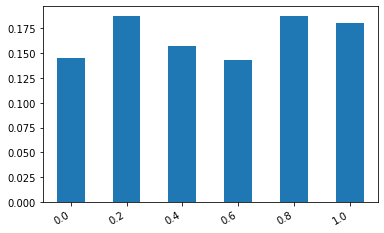

In [4]:
# Plot frequency of distinct values.
# Monitor differences between distance optimization methods.
bar_plot(simple_morris_sample)

0.998849630355835


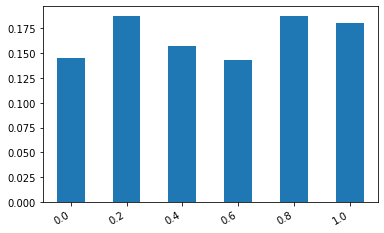

In [5]:
"""Draw trajectories with complete optimization from Ge and Menendez (2017)"""
# Measure data generation time.
# Monitor differences between generation times.
start = time.time()

final_ge_menendez_2014_list, final_gm14_pairs_dist_matrix, _ = hms.final_ge_menendez_2014(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)

gm14_array = simple_morris_sample = np.vstack(sample_traj_list)
bar_plot(gm14_array)

0.45121335983276367


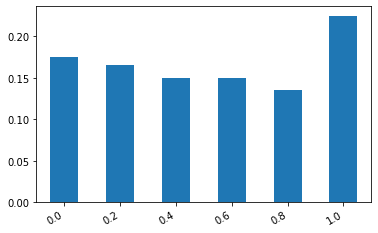

In [6]:
"""Draw trajectories with first step from optimization from Ge and Menendez (2017)"""
# Measure data generation time.
start = time.time()

intermediate_ge_menendez_2014_list, intermediate_gm14_pairs_dist_matrix, _ = hms.intermediate_ge_menendez_2014(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)

int_gm14_array = np.vstack(intermediate_ge_menendez_2014_list)
bar_plot(int_gm14_array)

13.857566833496094


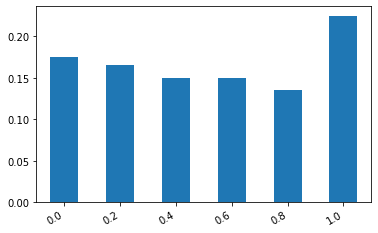

In [7]:
"""Draw trajectories with complete optimization from Campolongo (2007)"""
# Measure data generation time.
start = time.time()

campolongo_2007_list, c07_pairs_dist_matrix, _ = hms.campolongo_2007(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)

c_array = np.vstack(campolongo_2007_list)
bar_plot(c_array)

In [8]:
# Compute aggregate distance measure for sample of trajectories.
# The first step in Ge and Menendez (2017) yields the best compromise between speed and distance.
final_gm14_total_distance = hms.total_distance(final_gm14_pairs_dist_matrix)
intermediate_gm14_total_distance = hms.total_distance(intermediate_gm14_pairs_dist_matrix)
c07_gm14_total_distance = hms.total_distance(c07_pairs_dist_matrix)
simple_total_distance = hms.total_distance(simple_pairs_dist_matrix)

print(
    final_gm14_total_distance,
    intermediate_gm14_total_distance,
    c07_gm14_total_distance,
    simple_total_distance/20
)

107.10803334984526 116.75470385038726 116.75470385038726 11.284810299069683
